## Magnetic Materials - NTUA 2022-23 - Lab Report 1 <br>
Ηλιόπουλος Γεώργιος - 03118815

## 1.3.2 Επεξεργασία Μετρήσεων

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Function that reads the csv files

In [2]:
def read_csv (file):
    df = pd.read_csv(file)
    df.rename(columns={'second': 'Time','Volt':'Input Voltage','Volt.1':'Output Voltage'}, inplace=True)
    df = df.fillna(method='bfill')
    Vin = df["Input Voltage"].to_numpy()
    Iin = Vin / 1000
    Vout = df["Output Voltage"].to_numpy()
    time = df["Time"].to_numpy()
    return Vin, Iin, Vout, time

Function that makes the plots

In [3]:
def plot (Iin, Vout, time, title, size):
    fig, ax1 = plt.subplots(figsize=size)
    
    color = 'C0'
    l1, = ax1.plot(time, Iin, color)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel('I$_{in}$ (A)', color = color)
    ax1.plot(time, Iin, color, label = 'I$_{in}$ (A)')
    ax1.set_ylim(-0.001, 0.001)

    color = 'C1'
    ax2 = ax1.twinx()
    l2, = ax2.plot(time, Vout, color = color)
    
    ax2.set_ylabel('V$_{out}$ (V)', color = color)  # we already handled the x-label with ax1
    ax2.plot(time, Vout, color, label = 'V$_{out}$ (V)')
    ax2.tick_params(axis='y')

    ax2.legend([l1, l2], ['I$_{in}$ (A)', 'V$_{out}$ (V)'])
    
    ax1.grid()
    plt.title(title)

<br>
1. Για κάθε τιμή συχνότητας σήματος διέγερσης:

>1.1 Δημιουργήστε σε ένα κοινό διάγραμμα τις καμπύλες 𝑰𝒊𝒏(𝒕) και 𝑽𝒐𝒖𝒕(𝒕).

<Figure size 800x400 with 0 Axes>

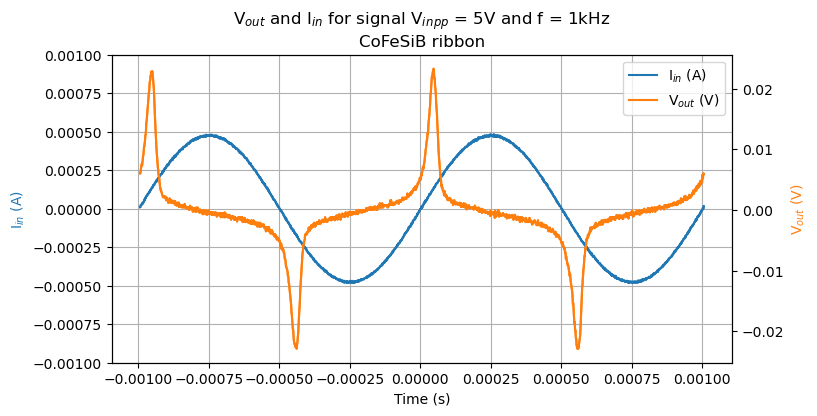

In [4]:
Vin, Iin, Vout, time = read_csv("1_1kHz.csv")
fig=plt.figure(figsize=(8,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$$_{pp}$ = 5V and f = 1kHz\nCoFeSiB ribbon", (8,4))

<Figure size 800x400 with 0 Axes>

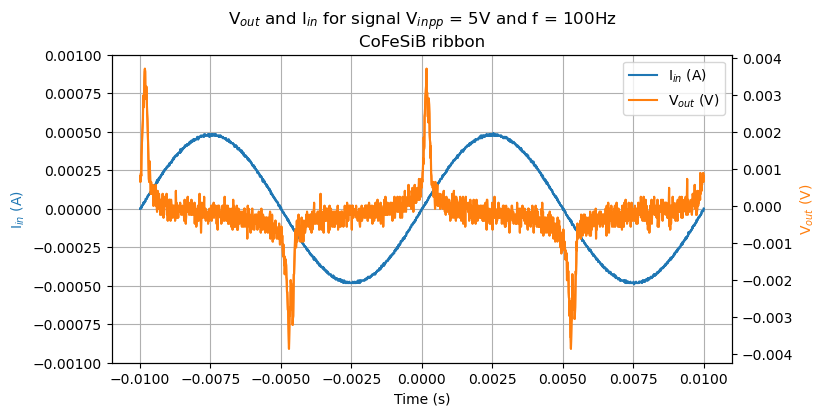

In [5]:
Vin, Iin, Vout, time = read_csv("1_100Hz.csv")
fig=plt.figure(figsize=(8,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$$_{pp}$ = 5V and f = 100Hz\nCoFeSiB ribbon", (8,4))

>1.3 Yπολογίστε το ολοκλήρωμα των τιμών της τάσης εξόδου

In [6]:
from scipy.integrate import cumulative_trapezoid

In [7]:
Vin, Iin, Vout, time = read_csv("1_1kHz.csv")
integral = cumulative_trapezoid(Vout, time)
print(integral[0:10])

[6.0301500e-09 1.2261305e-08 1.8894470e-08 2.5929645e-08 3.3216075e-08
 4.0703510e-08 4.8190945e-08 5.5728630e-08 6.3668325e-08 7.2110535e-08]


In [8]:
Vin, Iin, Vout, time = read_csv("1_100Hz.csv")
integral = cumulative_trapezoid(Vout, time)
print(integral[0:10])

[7.236000e-09 1.447200e-08 2.291400e-08 3.135600e-08 4.221000e-08
 5.708400e-08 7.396800e-08 9.286250e-08 1.137675e-07 1.362805e-07]


>1.4 Σχεδιάστε τον βρόχο υστέρησης, έχοντας στον οριζόντιο άξονα την ένταση του ρεύματος διέγερσης και στον κατακόρυφο άξονα τις τιμές που υπολογίσατε στο προηγούμενο βήμα.

In [9]:
def plot_loop (file, title):
    Vin, Iin, Vout, time = read_csv(file)
    integral = cumulative_trapezoid(Vout, time)
    plt.plot(Iin[0:len(integral)], integral)
    plt.xlabel('Input Current I (A)')
    plt.ylabel('Integral of Output Voltage (dV/dt)')
    plt.title(title)
    plt.grid()

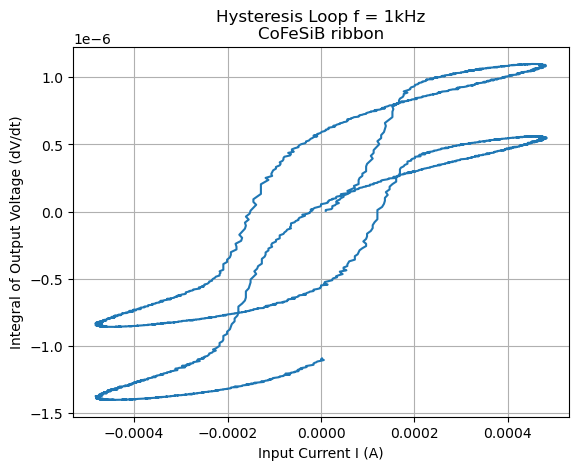

In [10]:
plot_loop("1_1kHz.csv", "Hysteresis Loop f = 1kHz\nCoFeSiB ribbon")

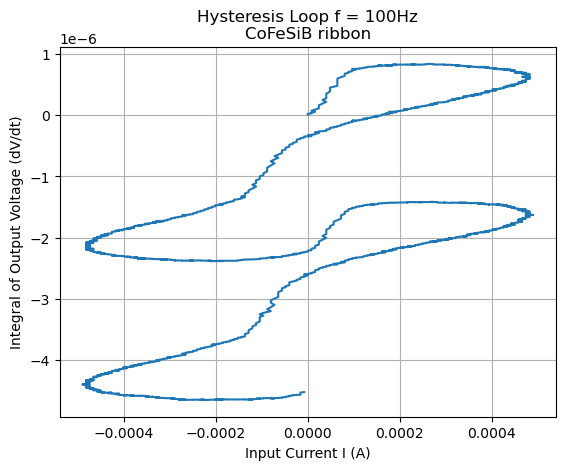

In [11]:
plot_loop("1_100Hz.csv", "Hysteresis Loop f = 100Hz\nCoFeSiB ribbon")

2. Για κάθε τιμή τάσης σήματος διέγερσης:

>2.1. Δημιουργήστε σε ένα κοινό διάγραμμα τις καμπύλες 𝑰𝒊𝒏(𝒕) και 𝑽𝒐𝒖𝒕(𝒕).

<Figure size 400x400 with 0 Axes>

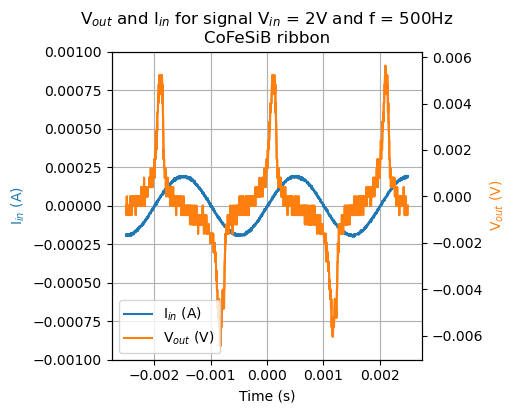

In [12]:
Vin, Iin, Vout, time = read_csv("2_2V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 2V and f = 500Hz\nCoFeSiB ribbon", (4,4))

<Figure size 400x400 with 0 Axes>

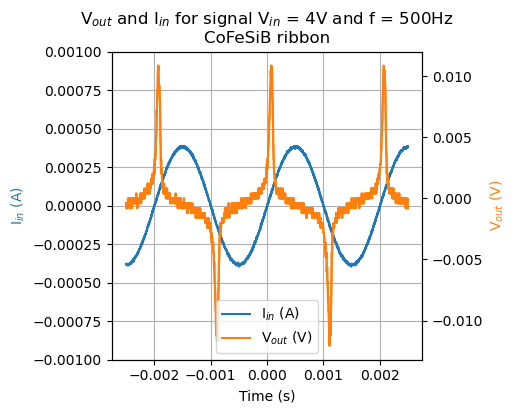

In [13]:
Vin, Iin, Vout, time = read_csv("2_4V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 4V and f = 500Hz\nCoFeSiB ribbon", (4,4))

<Figure size 400x400 with 0 Axes>

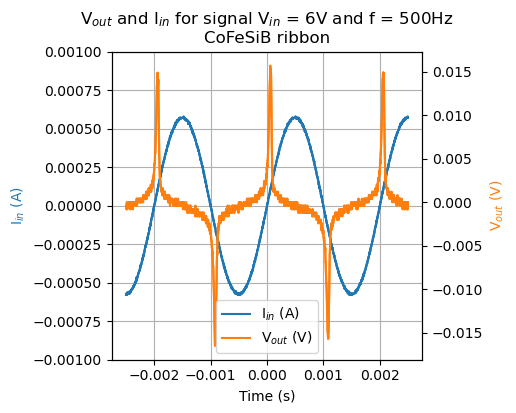

In [14]:
Vin, Iin, Vout, time = read_csv("2_6V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 6V and f = 500Hz\nCoFeSiB ribbon", (4,4))

<Figure size 400x400 with 0 Axes>

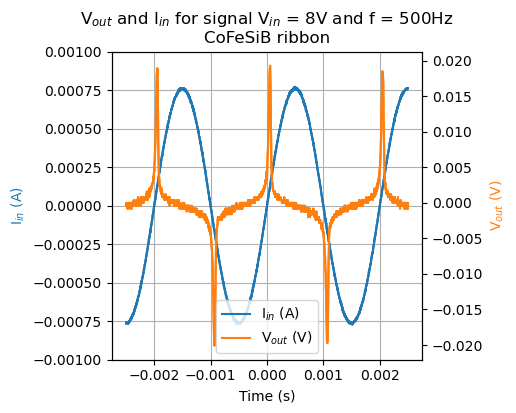

In [15]:
Vin, Iin, Vout, time = read_csv("2_8V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 8V and f = 500Hz\nCoFeSiB ribbon", (4,4))

<Figure size 400x400 with 0 Axes>

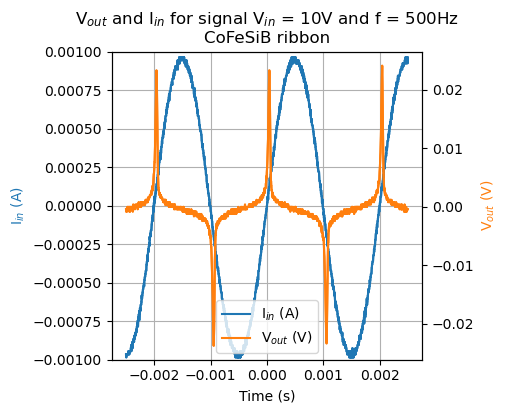

In [16]:
Vin, Iin, Vout, time = read_csv("2_10V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 10V and f = 500Hz\nCoFeSiB ribbon", (4,4))

>2.3. Σχεδιάστε την καμπύλη 𝑽𝒐𝒖𝒕(𝑰𝒊𝒏) και σχολιάστε την.

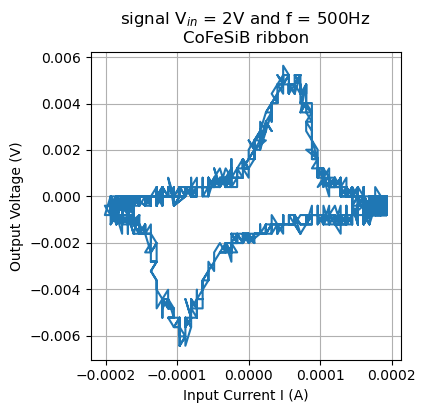

In [17]:
Vin, Iin, Vout, time = read_csv("2_2V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 2V and f = 500Hz\nCoFeSiB ribbon")
plt.grid()

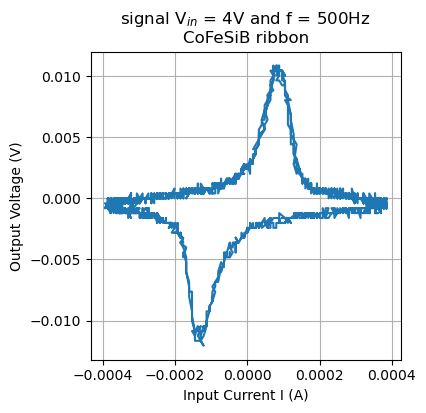

In [18]:
Vin, Iin, Vout, time = read_csv("2_4V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 4V and f = 500Hz\nCoFeSiB ribbon")
plt.grid()

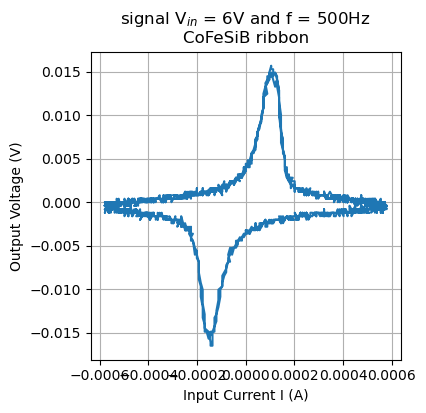

In [19]:
Vin, Iin, Vout, time = read_csv("2_6V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 6V and f = 500Hz\nCoFeSiB ribbon")
plt.grid()

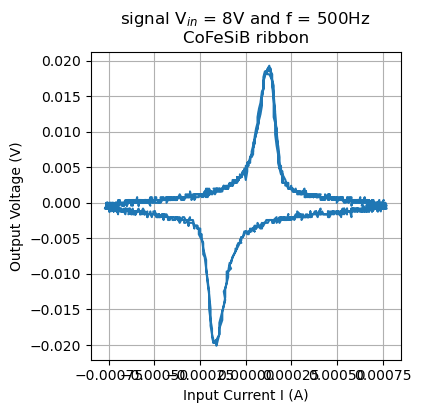

In [20]:
Vin, Iin, Vout, time = read_csv("2_8V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 8V and f = 500Hz\nCoFeSiB ribbon")
plt.grid()

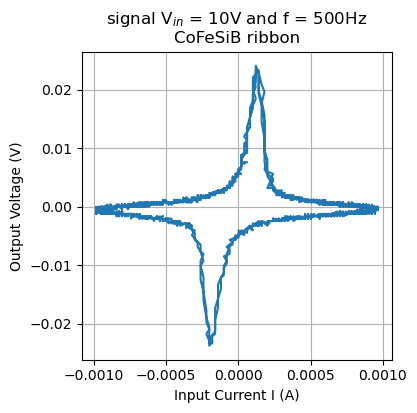

In [21]:
Vin, Iin, Vout, time = read_csv("2_10V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 10V and f = 500Hz\nCoFeSiB ribbon")
plt.grid()

>3. Επαναλάβετε το βήμα 1 για τον 2ο μαγνητικό πυρήνα (FeSiB wire) που χρησιμοποιήσατε

<Figure size 800x400 with 0 Axes>

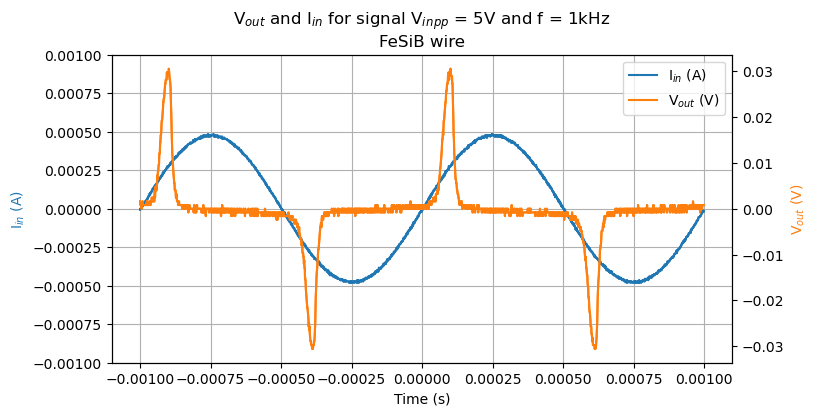

In [22]:
Vin, Iin, Vout, time = read_csv("3_1kHz.csv")
fig=plt.figure(figsize=(8,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$$_{pp}$ = 5V and f = 1kHz\nFeSiB wire", (8,4))

<Figure size 800x400 with 0 Axes>

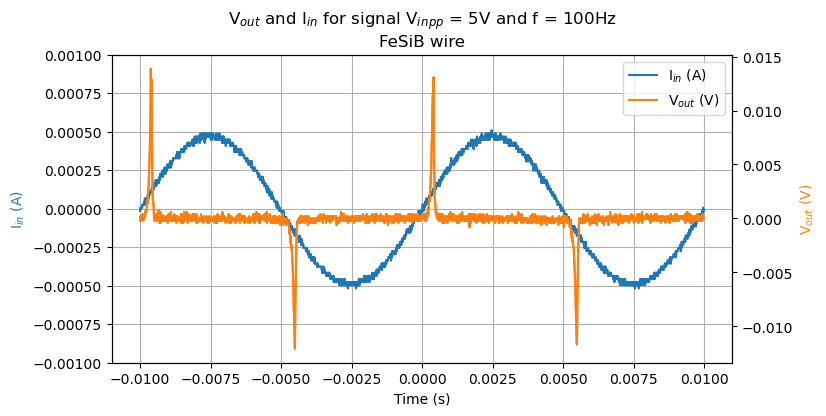

In [23]:
Vin, Iin, Vout, time = read_csv("3_100Hz.csv")
fig=plt.figure(figsize=(8,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$$_{pp}$ = 5V and f = 100Hz\nFeSiB wire", (8,4))

In [24]:
Vin, Iin, Vout, time = read_csv("3_1kHz.csv")
integral = cumulative_trapezoid(Vout, time)
print(integral[0:10])

[1.20603e-09 2.01005e-09 2.81407e-09 3.61809e-09 4.02010e-09 4.02010e-09
 4.42211e-09 5.22613e-09 6.43216e-09 7.63819e-09]


In [25]:
Vin, Iin, Vout, time = read_csv("3_100Hz.csv")
integral = cumulative_trapezoid(Vout, time)
print(integral[0:10])

[0.00000e+00 0.00000e+00 0.00000e+00 2.01010e-09 4.02020e-09 6.03030e-09
 8.04040e-09 9.04545e-09 1.10555e-08 1.40706e-08]


>4. Επαναλάβετε το βήμα 2 για τον 2ο μαγνητικό πυρήνα που χρησιμοποιήσατε.

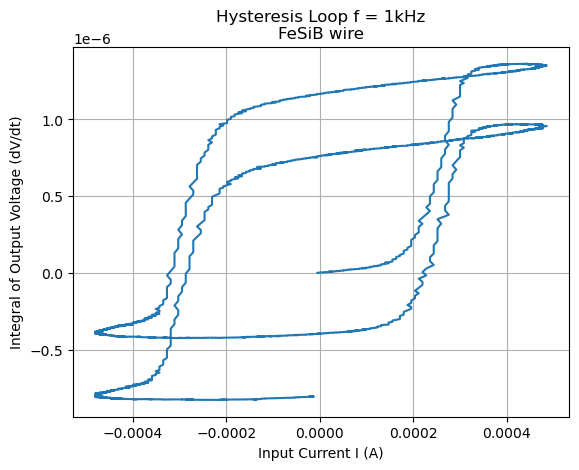

In [26]:
plot_loop("3_1kHz.csv", "Hysteresis Loop f = 1kHz\nFeSiB wire")

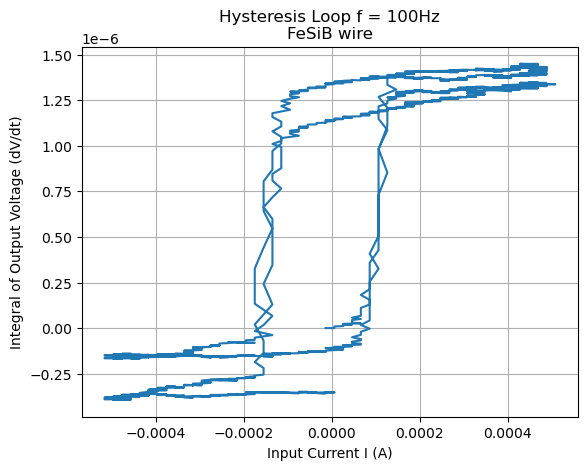

In [27]:
plot_loop("3_100Hz.csv", "Hysteresis Loop f = 100Hz\nFeSiB wire")

>Επαναλάβετε το βήμα 2 για τον 2ο μαγνητικό πυρήνα που χρησιμοποιήσατε.

<Figure size 400x400 with 0 Axes>

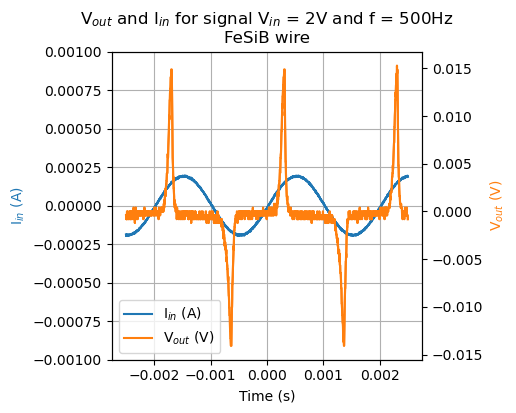

In [28]:
Vin, Iin, Vout, time = read_csv("4_2V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 2V and f = 500Hz\nFeSiB wire", (4,4))

<Figure size 400x400 with 0 Axes>

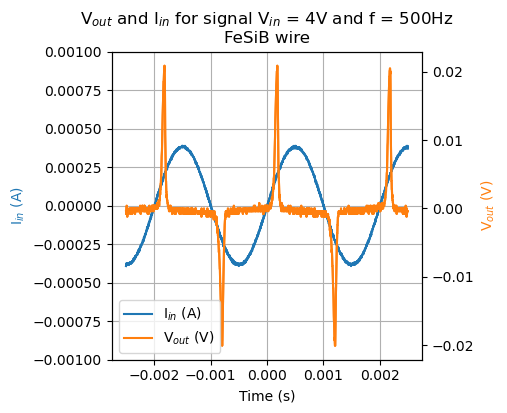

In [29]:
Vin, Iin, Vout, time = read_csv("4_4V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 4V and f = 500Hz\nFeSiB wire", (4,4))

<Figure size 400x400 with 0 Axes>

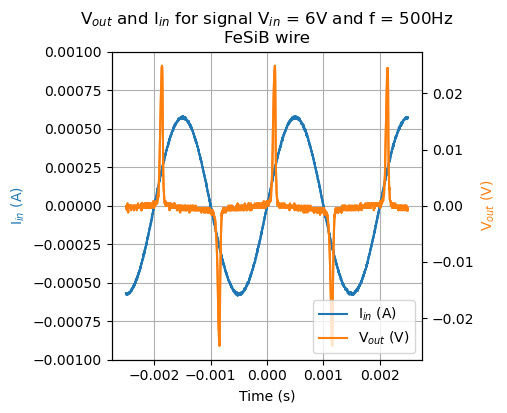

In [30]:
Vin, Iin, Vout, time = read_csv("4_6V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 6V and f = 500Hz\nFeSiB wire", (4,4))

<Figure size 400x400 with 0 Axes>

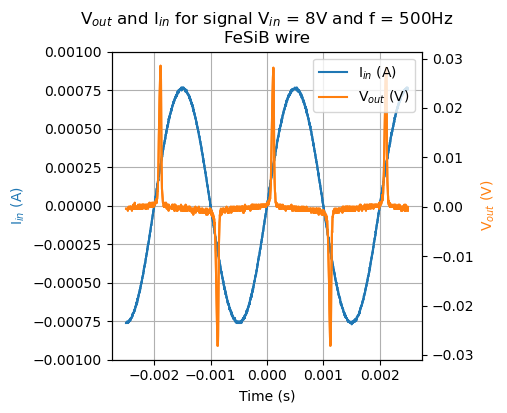

In [31]:
Vin, Iin, Vout, time = read_csv("4_8V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 8V and f = 500Hz\nFeSiB wire", (4,4))

<Figure size 400x400 with 0 Axes>

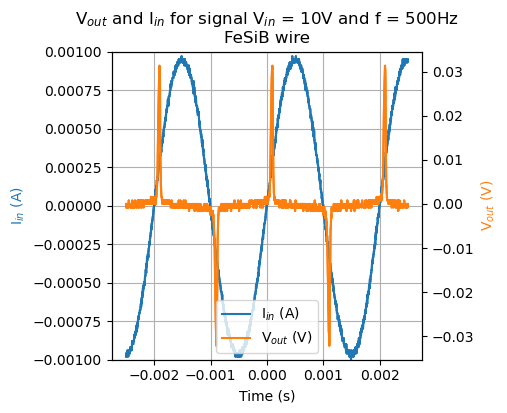

In [32]:
Vin, Iin, Vout, time = read_csv("4_10V.csv")
fig=plt.figure(figsize=(4,4))
plot(Iin, Vout, time, "V$_{out}$ and I$_{in}$ for signal V$_{in}$ = 10V and f = 500Hz\nFeSiB wire", (4,4))

>4.3. Σχεδιάστε την καμπύλη 𝑽𝒐𝒖𝒕(𝑰𝒊𝒏) και σχολιάστε την.

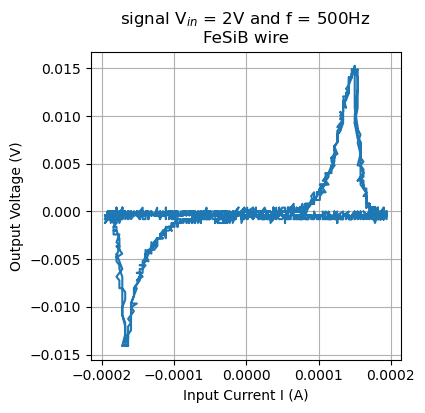

In [33]:
Vin, Iin, Vout, time = read_csv("4_2V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 2V and f = 500Hz\nFeSiB wire")
plt.grid()

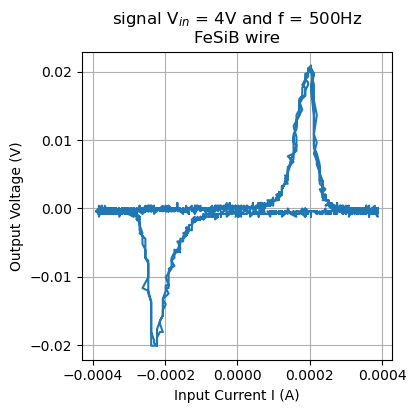

In [34]:
Vin, Iin, Vout, time = read_csv("4_4V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 4V and f = 500Hz\nFeSiB wire")
plt.grid()

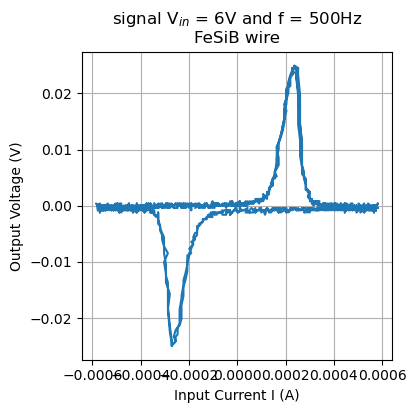

In [35]:
Vin, Iin, Vout, time = read_csv("4_6V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 6V and f = 500Hz\nFeSiB wire")
plt.grid()

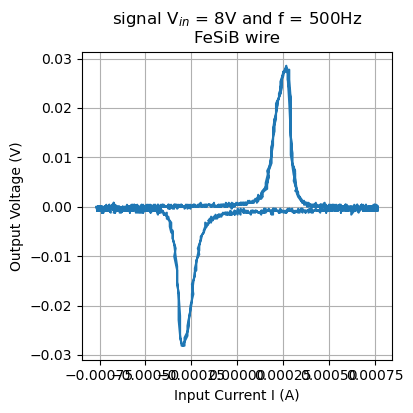

In [36]:
Vin, Iin, Vout, time = read_csv("4_8V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 8V and f = 500Hz\nFeSiB wire")
plt.grid()

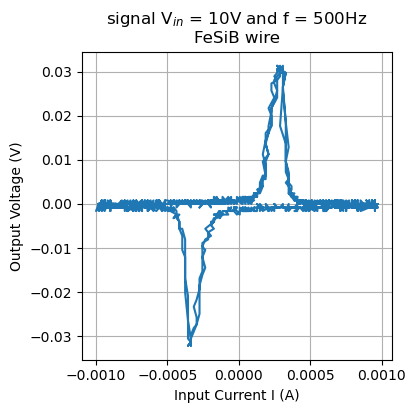

In [37]:
Vin, Iin, Vout, time = read_csv("4_10V.csv")
fig=plt.figure(figsize=(4,4))
plt.plot(Iin, Vout)
plt.xlabel('Input Current I (A)')
plt.ylabel('Output Voltage (V)')
plt.title("signal V$_{in}$ = 10V and f = 500Hz\nFeSiB wire")
plt.grid()